# 1.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

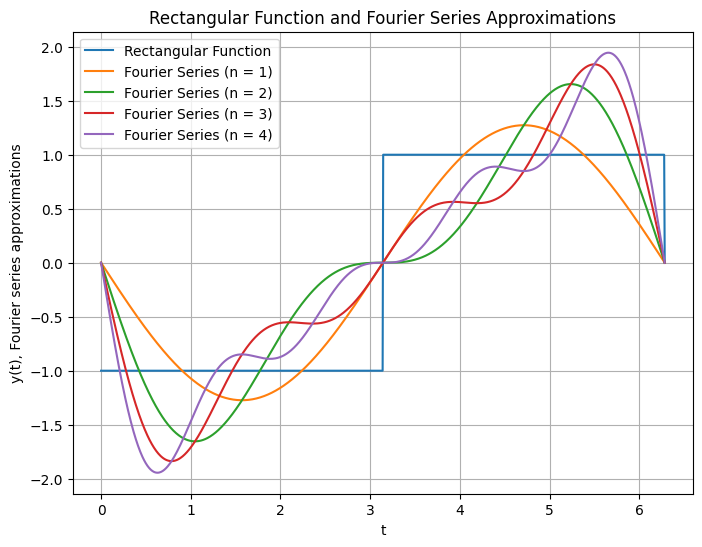

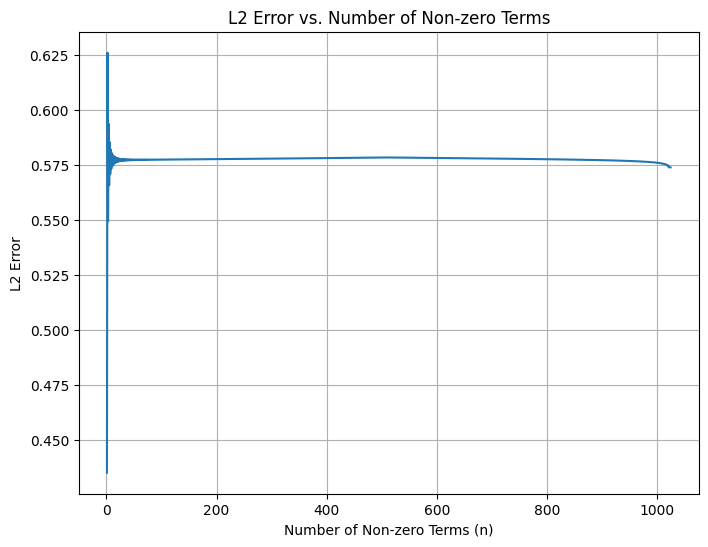

In [24]:
# Given rectangular function
def rectangular_function(x):
    if 0 <= x <= np.pi:
        return -1
    elif np.pi < x < 2*np.pi:
        return 1
    else:
      return 0

# Different Fourier series for n=1,2,3,4
def series_representation(n):
    t = np.linspace(0, 2 * np.pi, 1024)
    y = np.zeros(1024)
    for i in range(1, n + 1):
        y += (-4 / (np.pi * i)) * np.sin(i * t)
    return y

#Error
def l2_error(f, f_approx):
    return np.linalg.norm(f - f_approx) / np.linalg.norm(f)

epsilon = 2e-2
n = 1
l2_errors = []
n_values = []
x_values = np.linspace(0, 2*np.pi, 1024)
rectangular_values = np.array([rectangular_function(x) for x in x_values])

while n <= 1024:
    fourier_series_values = series_representation(n)
    error = l2_error(rectangular_values, fourier_series_values)
    l2_errors.append(error)
    n_values.append(n)
    if error < epsilon:
        break
    n += 1

fourier_series_values_1 = series_representation(1)
fourier_series_values_2 = series_representation(2)
fourier_series_values_3 = series_representation(3)
fourier_series_values_4 = series_representation(4)

plt.figure(figsize=(8, 6))
plt.plot(x_values, rectangular_values, label='Rectangular Function')
plt.plot(x_values, fourier_series_values_1, label='Fourier Series (n = 1)')
plt.plot(x_values, fourier_series_values_2, label='Fourier Series (n = 2)')
plt.plot(x_values, fourier_series_values_3, label='Fourier Series (n = 3)')
plt.plot(x_values, fourier_series_values_4, label='Fourier Series (n = 4)')
plt.xlabel('t')
plt.ylabel('y(t), Fourier series approximations')
plt.legend()
plt.grid(True)
plt.title('Rectangular Function and Fourier Series Approximations')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(n_values, l2_errors)
plt.xlabel('Number of Non-zero Terms (n)')
plt.ylabel('L2 Error')
plt.grid(True)
plt.title('L2 Error vs. Number of Non-zero Terms')
plt.show()


## 2.

In [18]:
# 2a)
def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=np.complex128)

    for k in range(N):
        sum_real = 0
        sum_imaginary = 0

        for n in range(N):
            angle = -2 * np.pi * n * k / N
            real_part = np.cos(angle)
            imaginary_part = np.sin(angle)
            sum_real += x[n] * real_part
            sum_imaginary += x[n] * imaginary_part

        X[k] = (sum_real + sum_imaginary * 1j) / N

    return X

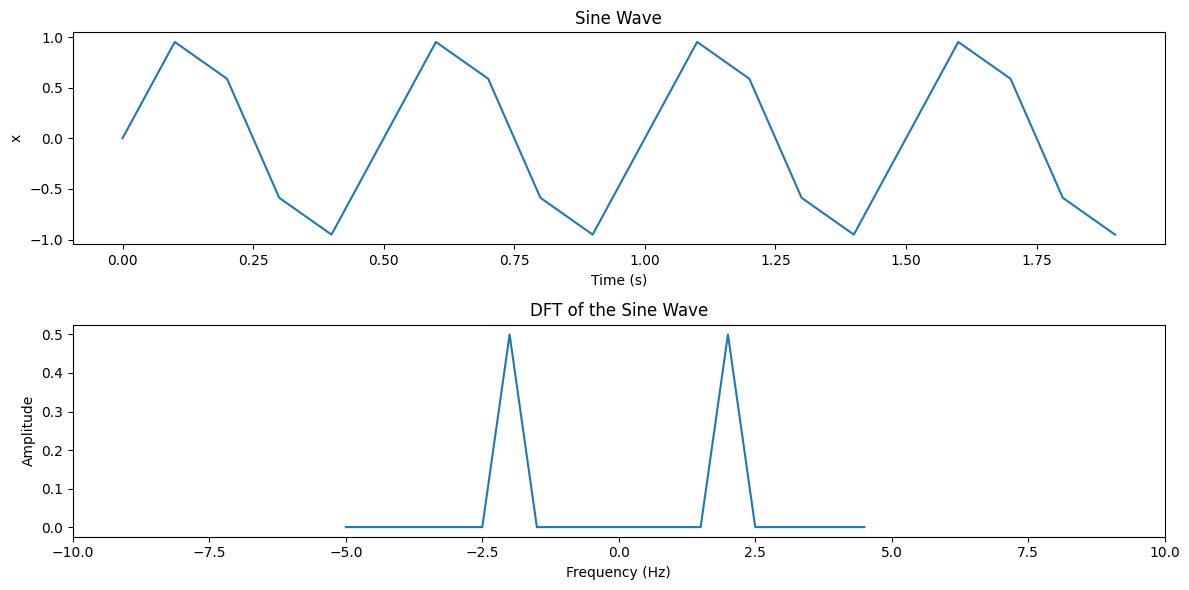

In [20]:
# 2b)
f = 2
L = 2
fs = 10
N = L * fs
t = np.arange(0, L, 1/fs)

x = np.sin(2 * np.pi * f * t)

X = dft(x)
X_shifted = np.fft.fftshift(X)

freq = np.fft.fftfreq(N, 1/fs)
freq_shifted = np.fft.fftshift(freq)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.title('Sine Wave')
plt.xlabel('Time (s)')
plt.ylabel('x')

plt.subplot(2, 1, 2)
plt.plot(freq_shifted, np.abs(X_shifted))
plt.title('DFT of the Sine Wave')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.xlim(-fs,fs)

plt.tight_layout()
plt.show()

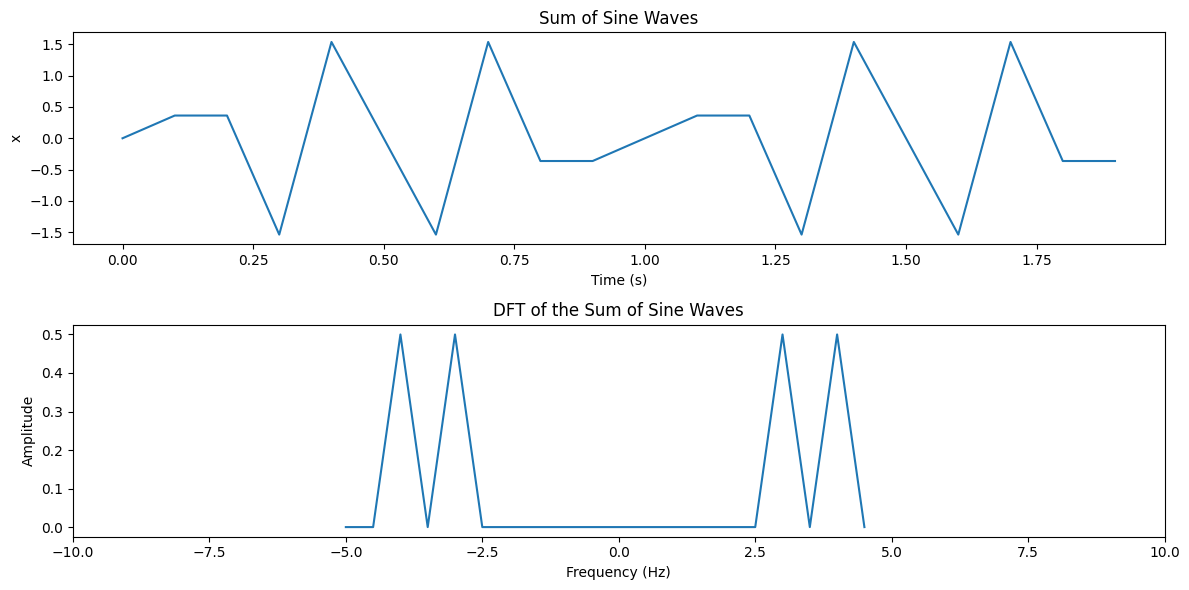

In [11]:
# 2c)
f1 = 3
f2 = 6
L = 2
fs = 10
N = L * fs
t = np.arange(0, L, 1/fs)

x = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

X = dft(x)
X_shifted = np.fft.fftshift(X)

freq = np.fft.fftfreq(N, 1/fs)
freq_shifted = np.fft.fftshift(freq)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.title('Sum of Sine Waves')
plt.xlabel('Time (s)')
plt.ylabel('x')

plt.subplot(2, 1, 2)
plt.plot(freq_shifted, np.abs(X_shifted))
plt.title('DFT of the Sum of Sine Waves')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.xlim(-fs, fs)

plt.tight_layout()
plt.show()